In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt


def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """

    import platform
    system_name = platform.system()

    if system_name == 'Darwin':
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(Colab)
        # !apt-get install fonts-nanum -qq > /dev/null
        # !fc-cache -fv 

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = "NanumBarunGothic"
    return font_family


def set_font_family(font_family=get_font_family()):
    """
    matplotlib 폰트를 설정하는 함수
    style 설정은 꼭 폰트설정 위에서 합니다.
    style 에 폰트 설정이 들어있으면 한글폰트가 초기화 되어 한글이 깨집니다.
    """

    plt.style.use("seaborn")

    # 폰트 설정
    plt.rc("font", family=get_font_family())

    # 마이너스 폰트 설정
    plt.rc("axes", unicode_minus=False)

    # 그래프에 retina display 적용
    from IPython.display import set_matplotlib_formats
    set_matplotlib_formats("retina")

set_font_family()

/var/folders/md/nkdcc_y53654tkfkhydnl1g00000gn/T/ipykernel_7275/3614917924.py:48: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


In [3]:
def draw_barplot(data, title, figsize=(10,8)):
    fig, ax = plt.subplots(2, 1, figsize=figsize)
    for i, sex in enumerate(['남성','여성']):
        sns.barplot(ax=ax[i], x=data.columns, y=data.loc[f'{sex} 취업률'].tolist())
        ax[i].set(title=f'{sex} 취업률')

    plt.suptitle(title, fontsize=16)
    fig.patch.set_facecolor('white')
    plt.tight_layout()
    plt.show()

# 장애유형별, 성별 장애인 취업자 수 및 취업률

In [4]:
disable_sex = {'남성 취업자':{'지체장애':382587,'지체 외 신체외부':23882,'시각장애':74358,'시각 외 감각장애':90754,'정신적 장애':48572,'(발달)':42274,'신체내부 장애':28882},
                '남성 취업률':{'지체장애':55.4,'지체 외 신체외부':17.3,'시각장애':47.9,'시각 외 감각장애':40.4,'정신적 장애':27,'(발달)':33.1,'신체내부 장애':30.6},
                '여성 취업자':{'지체장애':133669,'지체 외 신체외부':9667,'시각장애':25242,'시각 외 감각장애':90754,'정신적 장애':21330,'(발달)':16328,'신체내부 장애':11494},
                '여성 취업률':{'지체장애':26,'지체 외 신체외부':9,'시각장애':26.4,'시각 외 감각장애':40.4,'정신적 장애':16,'(발달)':19.9,'신체내부 장애':20.7}}

disable_sex = pd.DataFrame(disable_sex).T
disable_sex

,지체장애,지체 외 신체외부,시각장애,시각 외 감각장애,정신적 장애,(발달),신체내부 장애
남성 취업자,382587.0,23882.0,74358.0,90754.0,48572.0,42274.0,28882.0
남성 취업률,55.4,17.3,47.9,40.4,27.0,33.1,30.6
여성 취업자,133669.0,9667.0,25242.0,90754.0,21330.0,16328.0,11494.0
여성 취업률,26.0,9.0,26.4,40.4,16.0,19.9,20.7


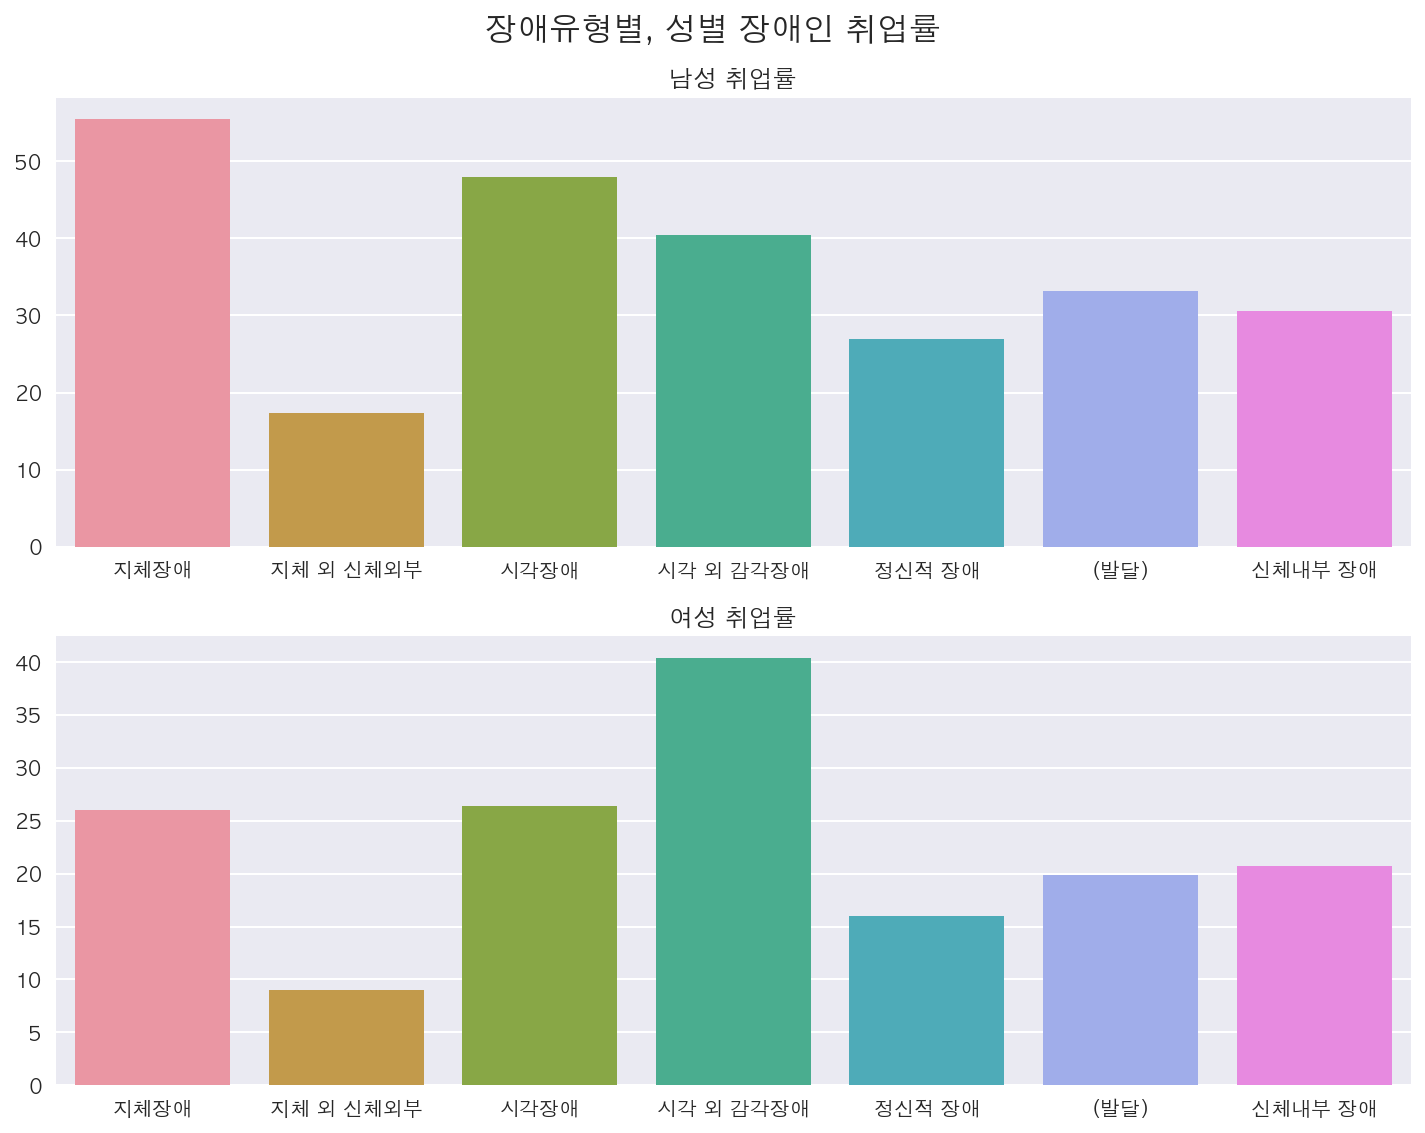

In [5]:
draw_barplot(disable_sex, '장애유형별, 성별 장애인 취업률')

# 장애연령별, 성별 장애인 취업자 수 및 취업률

In [6]:
disable_age = {'남성 취업자':{'15~29세':30288,'30~39세':54917,'40~49세':102926,'50~59세':178404,'60세 이상':282502,'15~64세':469166,'20~64세':468609},
                '남성 취업률':{'15~29세':38.5,'30~39세':63,'40~49세':63.6,'50~59세':57.1,'60세 이상':33.5,'15~64세':56,'20~64세':57.4},
                '여성 취업자':{'15~29세':16678,'30~39세':14020,'40~49세':30538,'50~59세':48916,'60세 이상':132616,'15~64세':140072,'20~64세':140068},
                '여성 취업률':{'15~29세':32.6,'30~39세':40,'40~49세':37.8,'50~59세':35.1,'60세 이상':16.9,'15~64세':34.4,'20~64세':35.4}}

disable_age = pd.DataFrame(disable_age).T
disable_age

,15~29세,30~39세,40~49세,50~59세,60세 이상,15~64세,20~64세
남성 취업자,30288.0,54917.0,102926.0,178404.0,282502.0,469166.0,468609.0
남성 취업률,38.5,63.0,63.6,57.1,33.5,56.0,57.4
여성 취업자,16678.0,14020.0,30538.0,48916.0,132616.0,140072.0,140068.0
여성 취업률,32.6,40.0,37.8,35.1,16.9,34.4,35.4


In [7]:
disable_detail_age = disable_age.drop(['15~64세','20~64세'],axis=1).copy()
disable_summay_age = disable_age.drop(['15~29세','30~39세','40~49세','50~59세','60세 이상'],axis=1).copy()

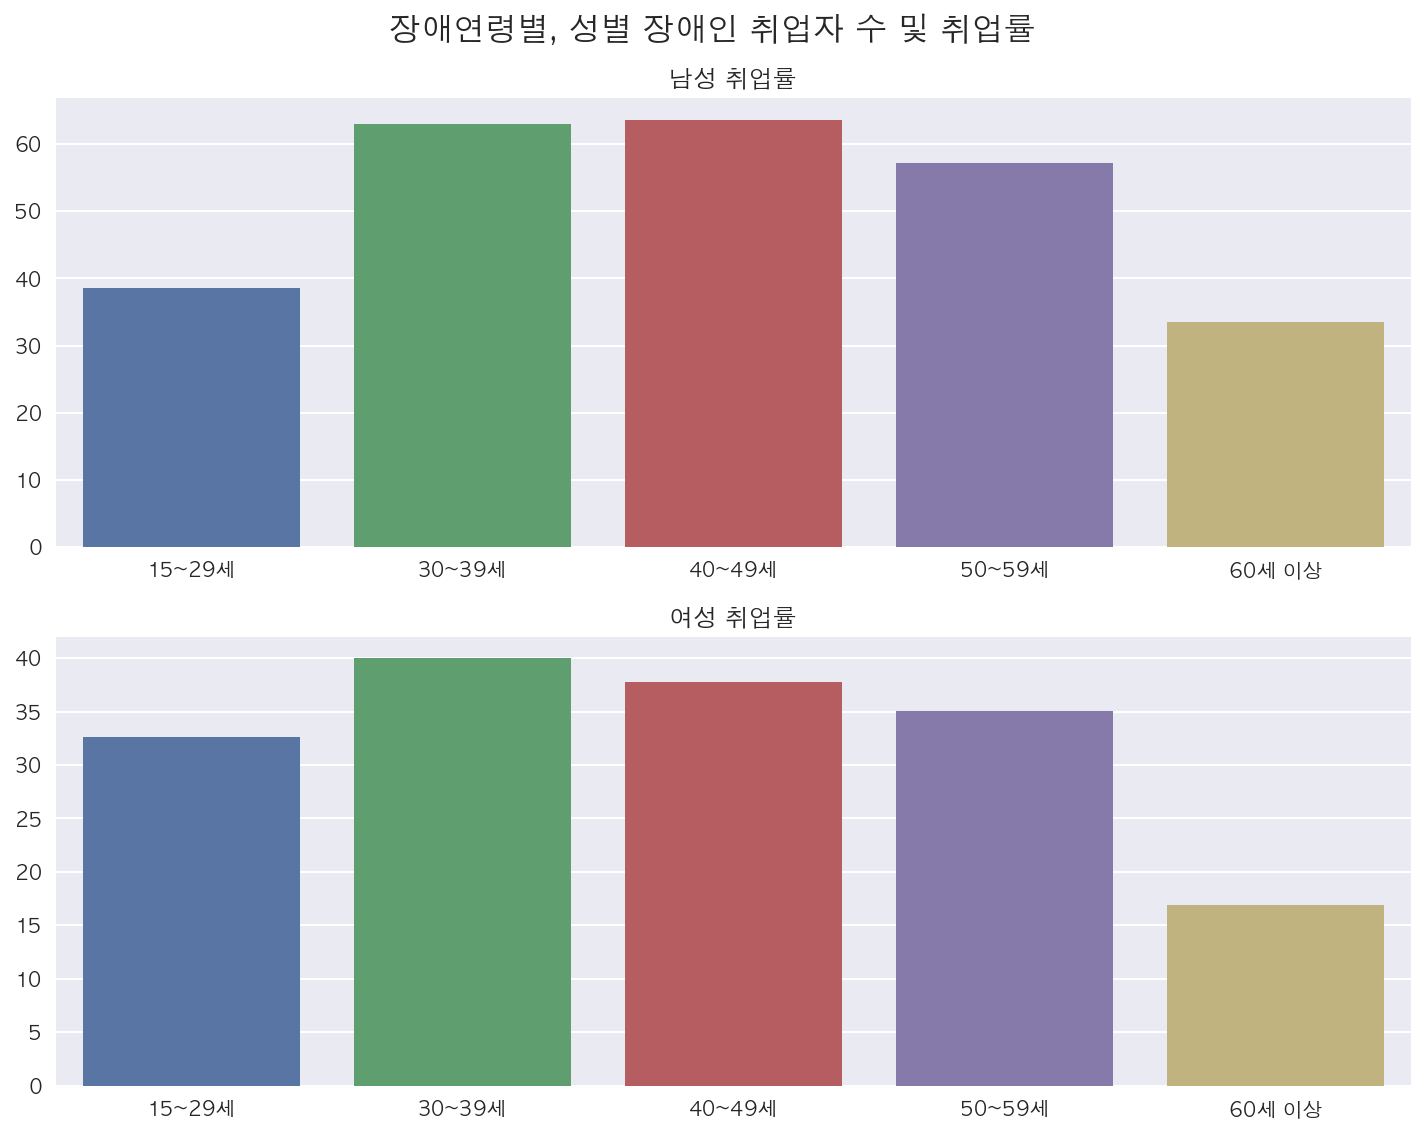

In [8]:
draw_barplot(disable_detail_age, '장애연령별, 성별 장애인 취업자 수 및 취업률')

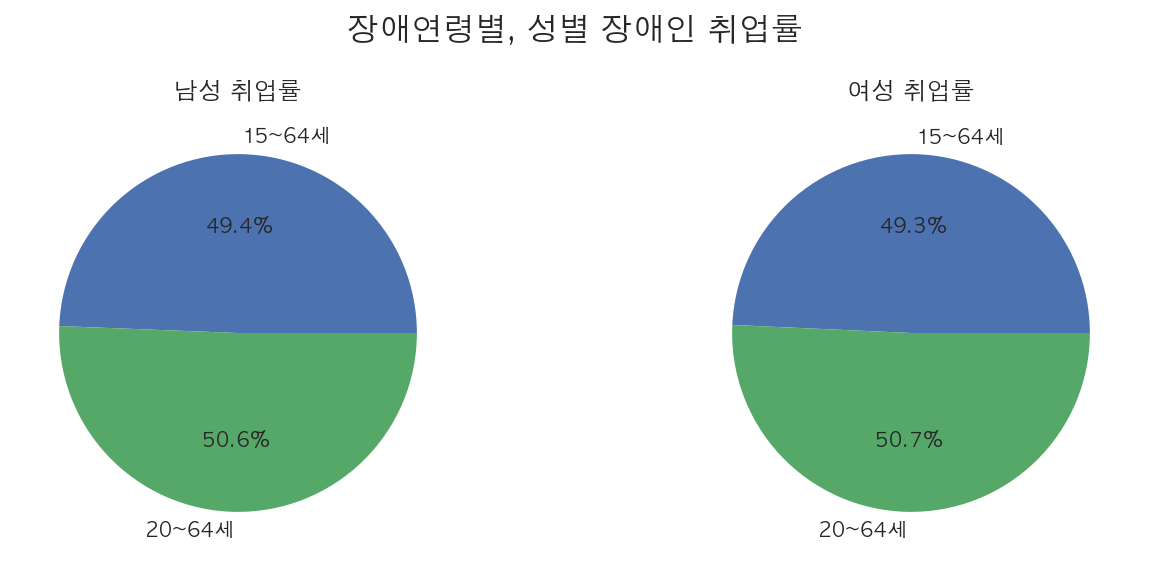

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
for i, sex in enumerate(['남성','여성']):
    ax[i].pie(disable_summay_age.loc[f'{sex} 취업률'].tolist(), labels=disable_summay_age.columns, autopct='%.1f%%')
    ax[i].set(title=f'{sex} 취업률')

plt.suptitle('장애연령별, 성별 장애인 취업률', fontsize=16)
fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()

# 장애정도별, 성별 장애인 취업자 수 및 취업률

In [10]:
disable_degree = {'남성 취업자':{'중증':125136,'경증':47872},
                '남성 취업률':{'중증':26.8,'경증':14.7},
                '여성 취업자':{'중증':523900,'경증':194896},
                '여성 취업률':{'중증':51.6,'경증':25.4}}

disable_degree = pd.DataFrame(disable_degree).T
disable_degree

,중증,경증
남성 취업자,125136.0,47872.0
남성 취업률,26.8,14.7
여성 취업자,523900.0,194896.0
여성 취업률,51.6,25.4


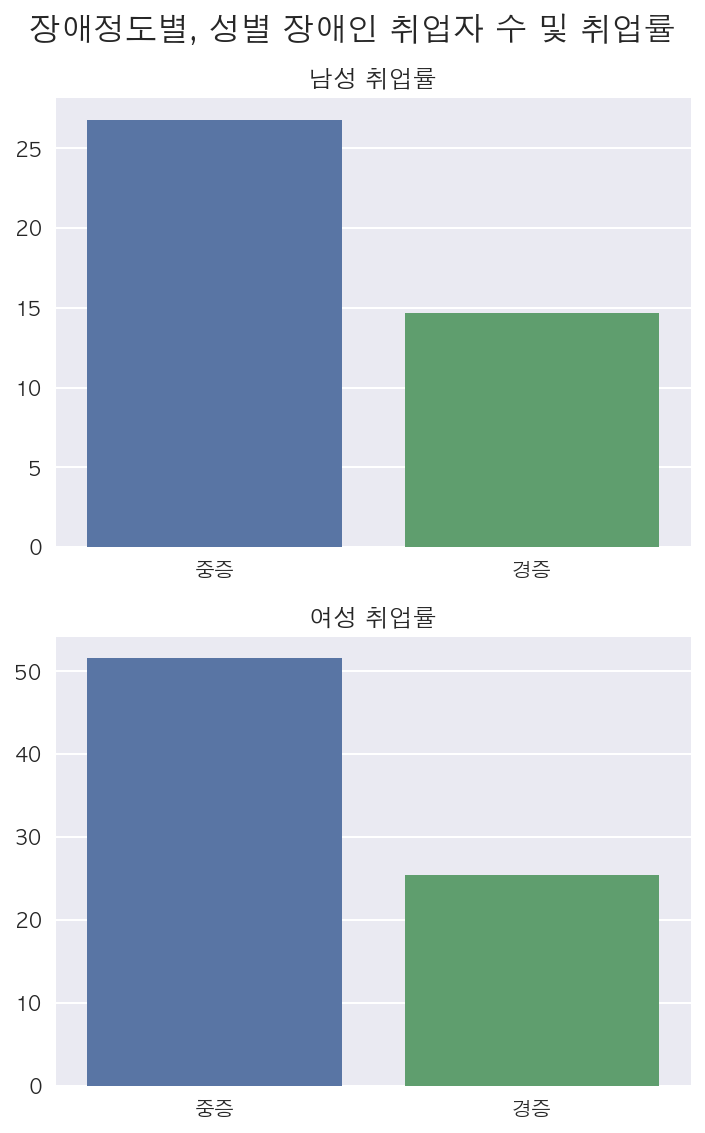

In [11]:
draw_barplot(disable_degree, '장애정도별, 성별 장애인 취업자 수 및 취업률', figsize=(5,8))

# 지역별, 성별 장애인 취업자 수 및 취업률

In [12]:
disable_loc = {'남성 취업자':{'서울':76767,'경기도':154588,'광역시도':160474,'기타시도':257206,},
                '남성 취업률':{'서울':34.9,'경기도':46.1,'광역시도':43.8,'기타시도':45.8,},
                '여성 취업자':{'서울':34996,'경기도':40309,'광역시도':52578,'기타시도':114886,},
                '여성 취업률':{'서울':21.1,'경기도':18.4,'광역시도':20.1,'기타시도':25.8,}}

disable_loc = pd.DataFrame(disable_loc).T
disable_loc

,서울,경기도,광역시도,기타시도
남성 취업자,76767.0,154588.0,160474.0,257206.0
남성 취업률,34.9,46.1,43.8,45.8
여성 취업자,34996.0,40309.0,52578.0,114886.0
여성 취업률,21.1,18.4,20.1,25.8


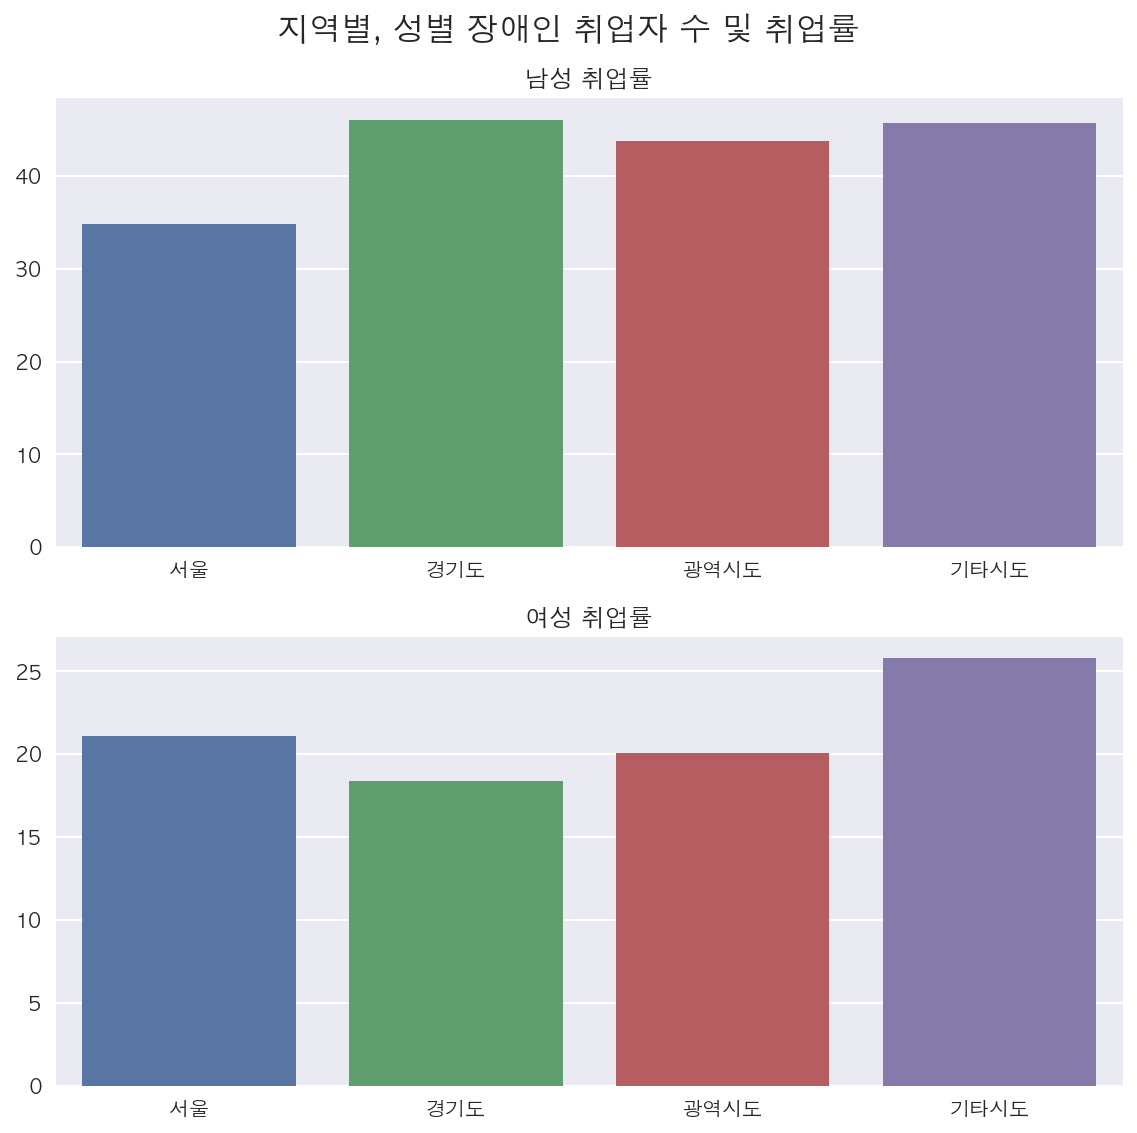

In [13]:
draw_barplot(disable_loc, '지역별, 성별 장애인 취업자 수 및 취업률', figsize=(8,8))

# 광역시도별 장애인 취업자 수 및 취업률

In [14]:
disable_detail_loc = {'취업자':{'서울':111763,'부산':58032,'대구':38309,'인천':49160,'광주':20577,'대전':26536,'울산':20439,'경기':194897,'강원':31772,'충북':40132,'충남':67770,'전북':46231,'전남':54296,'경북':62862,'경남':55880,'제주':13150},
                    '취업률':{'서울':29,'부산':33.6,'대구':31,'인천':34.4,'광주':30.2,'대전':37.4,'울산':41.1,'경기':35.2,'강원':31.7,'충북':41.8,'충남':47.2,'전북':35.6,'전남':39.1,'경북':35.3,'경남':30.3,'제주':36.9}}

disable_detail_loc = pd.DataFrame(disable_detail_loc).T
disable_detail_loc

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주
취업자,111763.0,58032.0,38309.0,49160.0,20577.0,26536.0,20439.0,194897.0,31772.0,40132.0,67770.0,46231.0,54296.0,62862.0,55880.0,13150.0
취업률,29.0,33.6,31.0,34.4,30.2,37.4,41.1,35.2,31.7,41.8,47.2,35.6,39.1,35.3,30.3,36.9


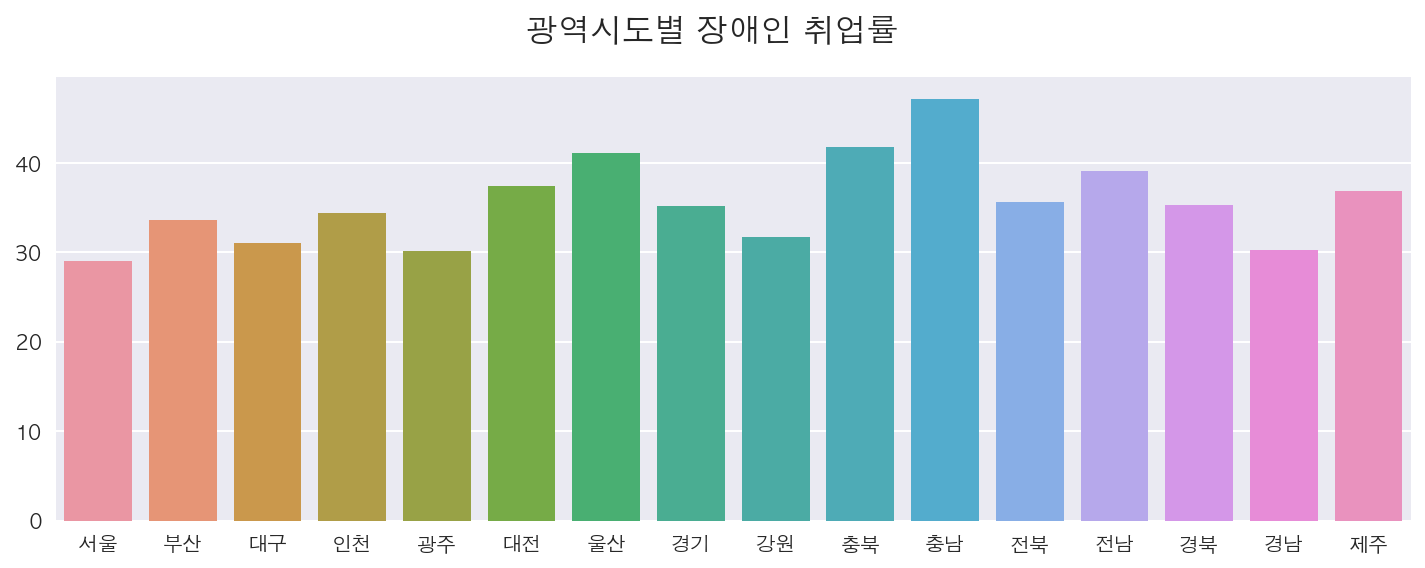

In [15]:
plt.figure(figsize=(10,4))
sns.barplot(x=disable_detail_loc.columns, y=disable_detail_loc.loc['취업률'].tolist())
plt.suptitle('광역시도별 장애인 취업률', fontsize=16)
fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()

# 학력별, 성별 장애인 취업자 수 및 취업률

In [16]:
disable_edu = {'남성 취업자':{'중졸 이하':216095,'고졸':257168,'대졸 이상':188985},
                '남성 취업률':{'중졸 이하':31.8,'고졸':49.6,'대졸 이상':61.8},
                '여성 취업자':{'중졸 이하':134912,'고졸':73546,'대졸 이상':44343},
                '여성 취업률':{'중졸 이하':17.4,'고졸':28.2,'대졸 이상':49.3}}

disable_edu = pd.DataFrame(disable_edu).T
disable_edu

,중졸 이하,고졸,대졸 이상
남성 취업자,216095.0,257168.0,188985.0
남성 취업률,31.8,49.6,61.8
여성 취업자,134912.0,73546.0,44343.0
여성 취업률,17.4,28.2,49.3


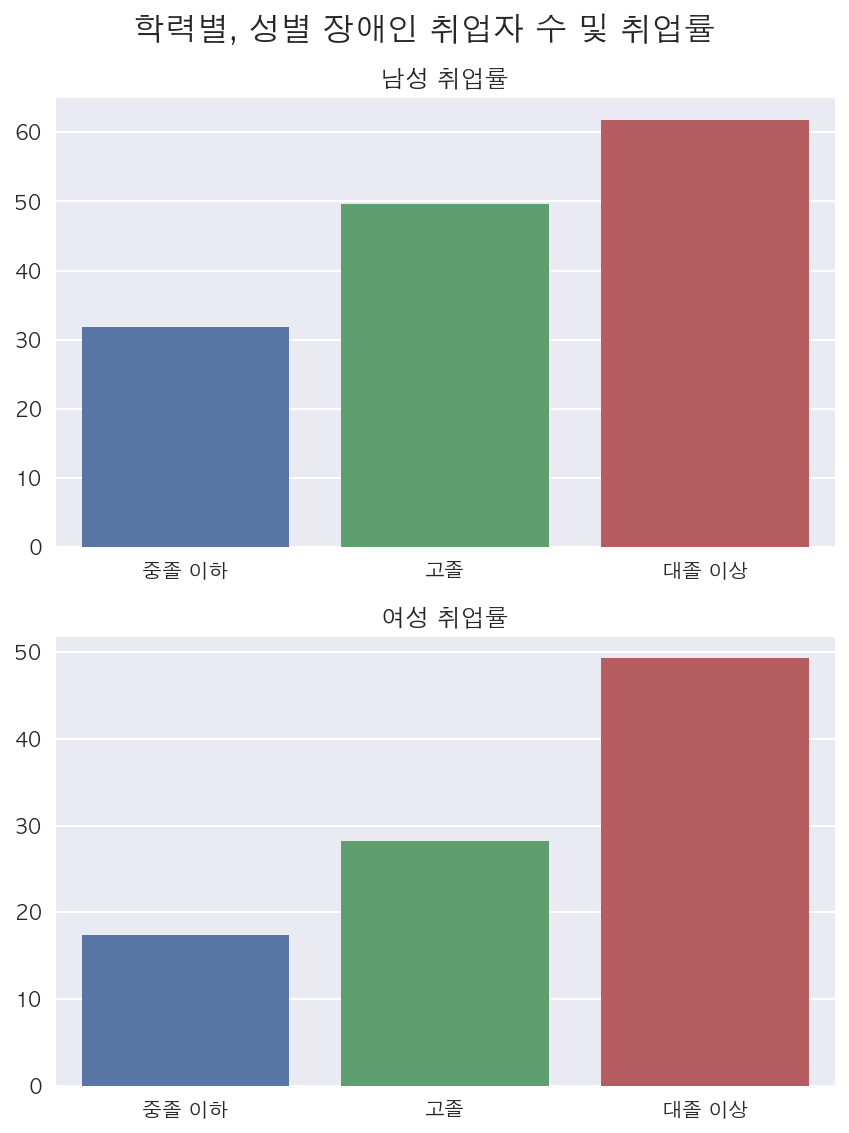

In [17]:
draw_barplot(disable_edu, '학력별, 성별 장애인 취업자 수 및 취업률', figsize=(6,8))